Install the necessary Python libraries

In [ ]:
!pip install useful_rdkit_utils rdkit_pypi pandas

Import the necessary Python libraries

In [1]:
from rdkit import Chem
import useful_rdkit_utils as uru
from io import StringIO
import pandas as pd

Define a couple of utility functions

In [2]:
def clear_substructure_match(mol):
    """Clear substructure highlights
    :param mol: input molecule
    :return: None
    """
    mol.__sssAtoms = []
    
def clear_atom_labels(mol):
    """Clear atom labels
    :param mol: input molecule
    :return: None
    """
    label_list = [""]*mol.GetNumAtoms()
    uru.label_atoms(mol, label_list)

The molfile for our test molecule

In [3]:
mb = """
  Mrv2004 04242211062D          

 48 55  0  0  0  0            999 V2000
    6.7056    1.0216    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.6959    1.8465    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9767    2.2507    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2671    1.8298    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2767    1.0049    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9960    0.6008    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0056   -0.2242    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.7249   -0.6283    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.4345   -0.2075    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.4248    0.6175    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.4775    2.1106    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.9702    1.4489    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5671    0.5841    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2960   -0.6450    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5768   -0.2409    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8479    0.9882    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8383    1.8131    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5479    2.2340    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1238    2.2256    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4093    1.8131    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4093    0.9881    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1238    0.5756    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1238   -0.2494    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6949    0.5756    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9327    0.8913    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2781    0.3891    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4841    0.7048    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3858   -0.4288    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2687   -0.9311    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1827   -0.6424    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2904   -1.4603    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1610   -1.7490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8755   -2.1615    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7678   -2.9794    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5300   -3.2952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7865    1.2610    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2135    1.3359    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2566    0.5120    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5647    0.0626    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4784    1.7104    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9917    0.1374    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6836    0.5867    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6405    1.4106    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9054    1.7852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2566   -0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3324    1.8599    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0674    0.1215    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8296    0.4372    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  7  8  1  0  0  0  0
  8  9  2  0  0  0  0
  9 10  1  0  0  0  0
  1  6  1  0  0  0  0
  1 10  2  0  0  0  0
  6  7  2  0  0  0  0
  2 11  1  0  0  0  0
 10 12  1  0  0  0  0
 11 12  1  0  0  0  0
  5 13  1  0  0  0  0
  7 14  1  0  0  0  0
 13 15  1  0  0  0  0
 14 15  2  0  0  0  0
 13 16  1  0  0  0  0
 16 17  2  0  0  0  0
 17 18  1  0  0  0  0
 18  4  1  0  0  0  0
 19 20  2  0  0  0  0
 20 21  1  0  0  0  0
 21 22  2  0  0  0  0
 19 17  1  0  0  0  0
 22 16  1  0  0  0  0
 22 23  1  0  0  0  0
 21 24  1  0  0  0  0
 24 25  2  0  0  0  0
 25 26  1  0  0  0  0
 26 27  1  0  0  0  0
 26 28  1  0  0  0  0
 28 29  1  0  0  0  0
 28 30  1  0  0  0  0
 30 31  2  0  0  0  0
 29 32  2  0  0  0  0
 32 33  1  0  0  0  0
 33 34  1  0  0  0  0
 34 35  3  0  0  0  0
 37 38  1  0  0  0  0
 38 39  1  0  0  0  0
 37 40  1  0  0  0  0
 36 40  1  0  0  0  0
 41 42  1  0  0  0  0
 42 43  1  0  0  0  0
 43 44  1  0  0  0  0
 37 44  1  0  0  0  0
 38 41  1  0  0  0  0
 38 45  1  0  0  0  0
 43 46  1  0  0  0  0
 27 47  1  0  0  0  0
 47 48  1  0  0  0  0
 39 48  1  0  0  0  0
 48 36  1  0  0  0  0
M  END
"""

Create an RDKit molecule from the molfile

In [4]:
mol = Chem.MolFromMolBlock(mb)

Display the moleucule

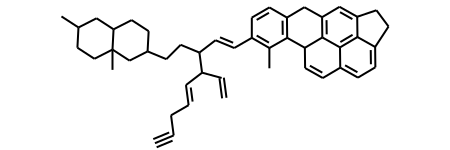

In [5]:
mol

Match a SMARTS then display the molecule with the matches

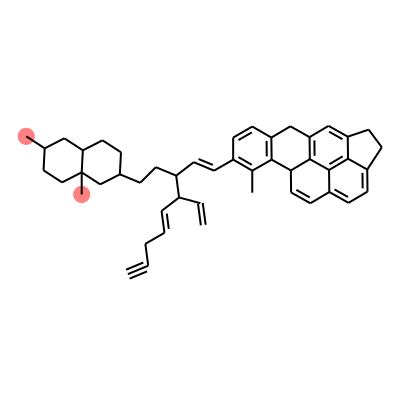

In [6]:
pat = Chem.MolFromSmarts("[C;$([CH3]A)]")
mol.GetSubstructMatches(pat)
uru.rd_set_image_size(400,400)
clear_atom_labels(mol)
mol

Define a set of atom typing rules.  I realize this set is incomplete, but hopefully the rules below provide a good example for the remaining rules. 

In [7]:
rules = """xCH3,[C;$([CH3]A)]
xCH2,[C;$([CH2])]
rCH,[C;$([CR1H1])]
rCH2,[C;$([CR1H2])]
CH#,[C;$([CH1]#*)]
CH2=,[C;$([CH2]=*)]
CH=,[C;$([CH1]([A^3])=A)]
aCH,[c;$([cH1])]
aC,[c;$([cH0])]
yCH,[C;$([CH]([*^2]))]
yCH2,[C;$([CH2]([*^2]))]
yyCH2,[C;$([CH2]([*^2])([*^2]))]
yyCH,[C;$([CH]([A^2])([A^2]))]
yCH3,[C;$([CH3]a)]
aaaC,[c;$(c(c)(c)(c))]
bip,[c;$([cr6]-[cr6])]
"""
rules_csv = StringIO(rules)
rules_df = pd.read_csv(rules_csv,names=["Name","SMARTS"])
rules_df

,Name,SMARTS
0,xCH3,[C;$([CH3]A)]
1,xCH2,[C;$([CH2])]
2,rCH,[C;$([CR1H1])]
3,rCH2,[C;$([CR1H2])]
4,CH#,[C;$([CH1]#*)]
5,CH2=,[C;$([CH2]=*)]
6,CH=,[C;$([CH1]([A^3])=A)]
7,aCH,[c;$([cH1])]
8,aC,[c;$([cH0])]
9,yCH,[C;$([CH]([*^2]))]


Convert the SMARTS to RDKit molecule objects

In [8]:
rules_df['pat'] = rules_df.SMARTS.apply(Chem.MolFromSmarts)

In [9]:
rules_df

,Name,SMARTS,pat
0,xCH3,[C;$([CH3]A)],<rdkit.Chem.rdchem.Mol object at 0x121c7fac0>
1,xCH2,[C;$([CH2])],<rdkit.Chem.rdchem.Mol object at 0x121c7f7c0>
2,rCH,[C;$([CR1H1])],<rdkit.Chem.rdchem.Mol object at 0x121c7f880>
3,rCH2,[C;$([CR1H2])],<rdkit.Chem.rdchem.Mol object at 0x121c7f760>
4,CH#,[C;$([CH1]#*)],<rdkit.Chem.rdchem.Mol object at 0x121c7f940>
5,CH2=,[C;$([CH2]=*)],<rdkit.Chem.rdchem.Mol object at 0x121c7fa60>
6,CH=,[C;$([CH1]([A^3])=A)],<rdkit.Chem.rdchem.Mol object at 0x121c7fb80>
7,aCH,[c;$([cH1])],<rdkit.Chem.rdchem.Mol object at 0x121c7fbe0>
8,aC,[c;$([cH0])],<rdkit.Chem.rdchem.Mol object at 0x121c7fc40>
9,yCH,[C;$([CH]([*^2]))],<rdkit.Chem.rdchem.Mol object at 0x121c7fca0>


Match the rules against the molecule

In [10]:
def assign_atom_types(mol):
    match_list = [""] * mol.GetNumAtoms()
    for name, smarts, pat in rules_df.values:
        matches = [x[0] for x in mol.GetSubstructMatches(pat)]
        for m in matches:
            match_list[m] = name
    clear_substructure_match(mol)
    return match_list

Display the molecule with the labels

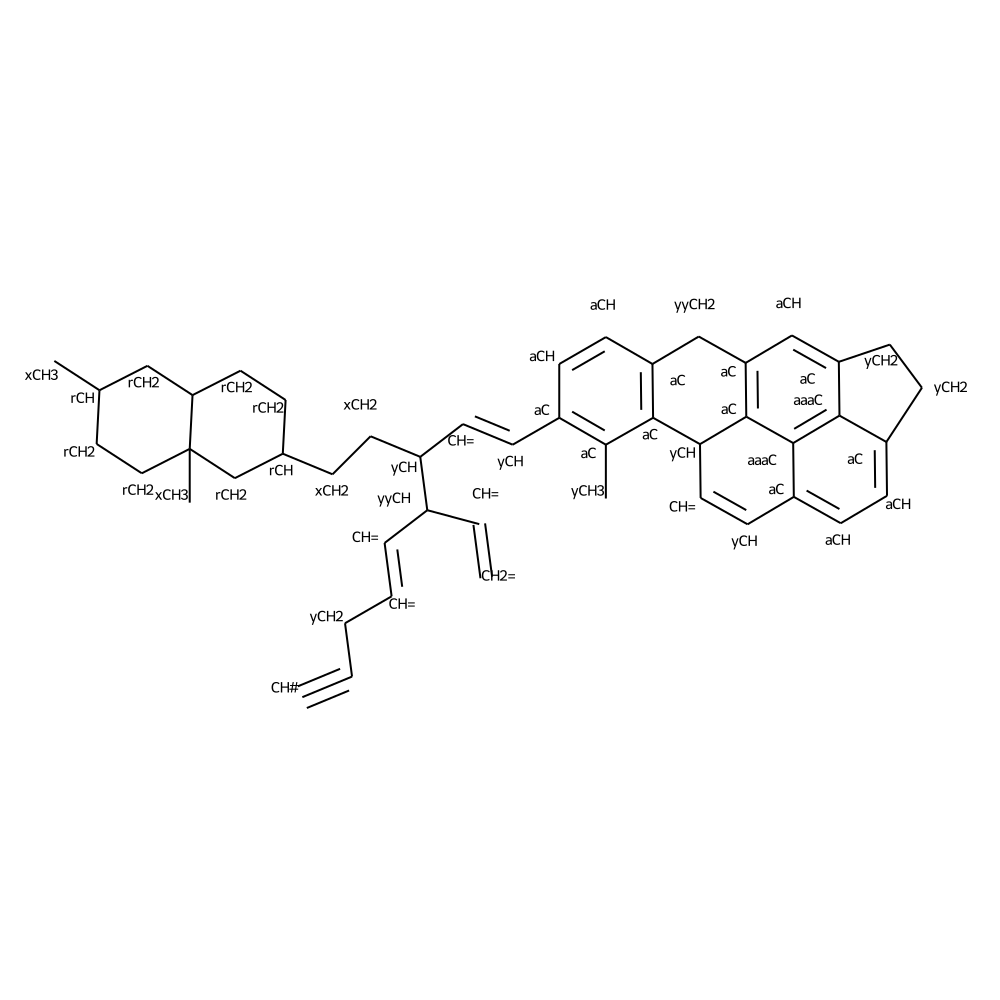

In [11]:
uru.rd_set_image_size(1000,1000)
atom_labels = assign_atom_types(mol)
uru.label_atoms(mol,atom_labels)

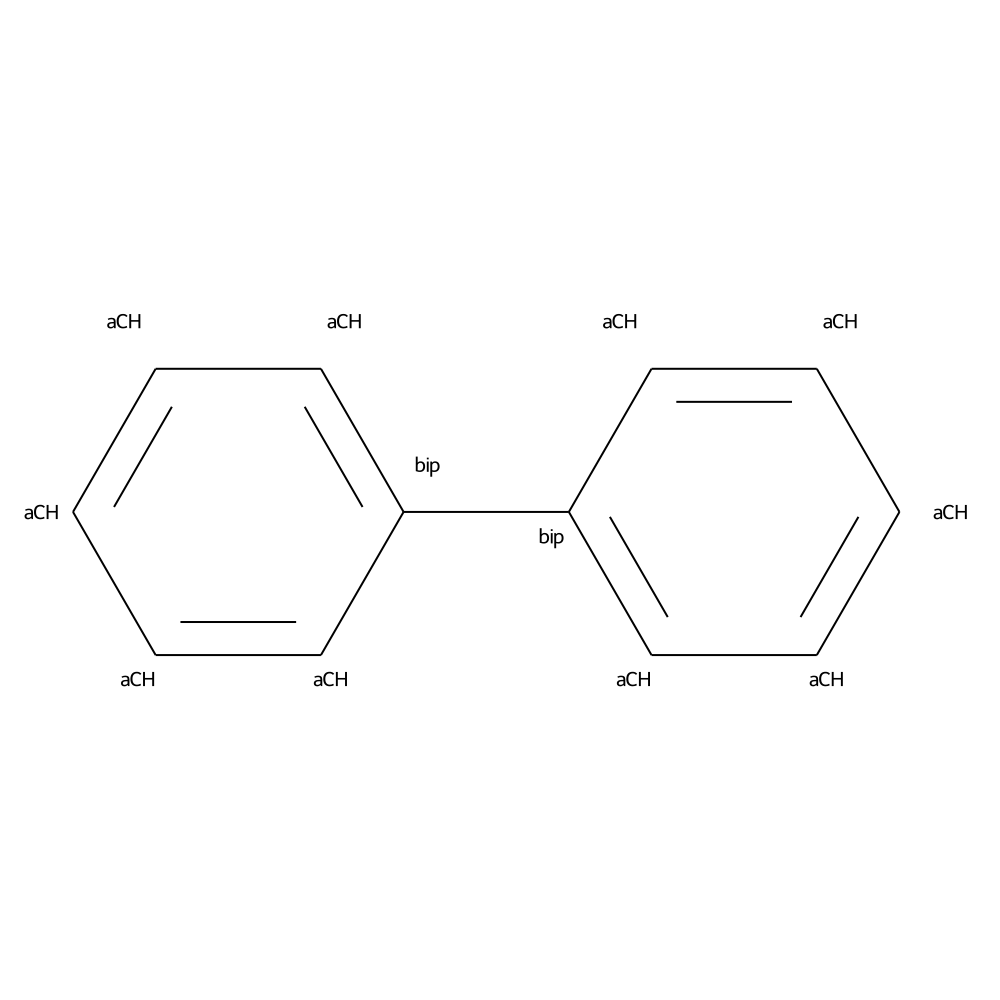

In [12]:
biphenyl_mol = Chem.MolFromSmiles("c1ccccc1-c2ccccc2")
atom_labels = assign_atom_types(biphenyl_mol)
uru.label_atoms(biphenyl_mol, atom_labels)